# Good coding to have
### 1. writing to a csv with unnecessary index
Saving the file pandas creates a new column, the index column
When reading the saved file the head shows a **Unnamed:0** column

In [15]:
import numpy as np
import pandas as pd
df = pd.read_csv("datasets/nobel.csv")
df.head(3)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany


In [14]:
df.to_csv("datasets/nobel_saved.csv")
df1 = pd.read_csv("datasets/nobel_saved.csv")
df1.head(3)

,Unnamed: 0,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany


In [8]:
%%cmd
more  "datasets\nobel_saved.csv"

Microsoft Windows [Version 10.0.22000.978]
(c) Microsoft Corporation. All rights reserved.

(base) C:\Users\bruni\OneDrive\Desktop\MS\Medallion>more  "datasets\nobel_saved.csv"
,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services he has rendered by the discovery of the laws of chemical dynamics and osmotic pressure in solutions""",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composition, which gives evidence of lofty idealism, artistic perfection and a rare combination of the qualities of both heart and intellect""",1/1,569,Individual,Sully P

**solution 1** - to avoid this mistake set **index=False** when saving csv

In [9]:
df.to_csv("datasets/nobel_saved_noindex.txt", index=False)

In [10]:
!more "datasets\nobel_saved_noindex.txt"

year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services he has rendered by the discovery of the laws of chemical dynamics and osmotic pressure in solutions""",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composition, which gives evidence of lofty idealism, artistic perfection and a rare combination of the qualities of both heart and intellect""",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,,,,1907-09-07,ChÃ¢tenay,France
1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its app

or alternatively **solution 2** - read the file tha have  the index saved indicating the **index_col** parameter

In [13]:
df = pd.read_csv("datasets/nobel_saved.csv", index_col=[0])
df.head(3)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany


### 2. Avoid column name that include spaces
Avoding using spaces in column name unable to dot syntax when column referencing.

Is preferable using _ instead of spaces

df['Fisrt initial']     can access column with space only in this way
df.'Fisrt initial'      and cannot access column with spaces in this way

So for example these columns with spaces **cannot be used in the simplified pandas query syntax** (see point below)

In [16]:
df = pd.read_csv("datasets/nobel_saved.csv")
df['First Initial'] = df['Unnamed: 0']    # can access column with space only in this way
df.columns

Index(['Unnamed: 0', 'year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_id', 'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country',
       'First Initial'],
      dtype='object')

In [17]:
df.'First Initial'                         # and cannot access column with spaces in this way

SyntaxError: invalid syntax (3442008619.py, line 1)

In [18]:
df.rename(columns={"First Initial": "First_Initial"}, inplace=True)
df.columns

Index(['Unnamed: 0', 'year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_id', 'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country',
       'First_Initial'],
      dtype='object')

In [21]:
df.First_Initial[:5]

0    0
1    1
2    2
3    3
4    4
Name: First_Initial, dtype: int64

In [23]:
#now the column che be used in query syntax
df.query('First_Initial > 100 & First_Initial < 110')[:5]

,Unnamed: 0,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,First_Initial
101,101,1920,Physics,The Nobel Prize in Physics 1920,"""in recognition of the service he has rendered...",1/1,25,Individual,Charles Edouard Guillaume,1861-02-15,Fleurier,Switzerland,Male,Bureau International des Poids et Mesures (Int...,Sèvres,France,1938-06-13,Sèvres,France,101
102,102,1921,Chemistry,The Nobel Prize in Chemistry 1921,"""for his contributions to our knowledge of the...",1/1,179,Individual,Frederick Soddy,1877-09-02,Eastbourne,United Kingdom,Male,University of Oxford,Oxford,United Kingdom,1956-09-22,Brighton,United Kingdom,102
103,103,1921,Literature,The Nobel Prize in Literature 1921,"""in recognition of his brilliant literary achi...",1/1,590,Individual,Anatole France,1844-04-16,Paris,France,Male,NaN,NaN,NaN,1924-10-12,Saint-Cyr-sur-Loire,France,103
104,104,1921,Peace,The Nobel Peace Prize 1921,NaN,1/2,485,Individual,Karl Hjalmar Branting,1860-11-23,Stockholm,Sweden,Male,NaN,NaN,NaN,1925-02-24,Stockholm,Sweden,104
105,105,1921,Peace,The Nobel Peace Prize 1921,NaN,1/2,486,Individual,Christian Lous Lange,1869-09-17,Stavanger,Norway,Male,NaN,NaN,NaN,1938-12-11,Oslo,Norway,105


### 3. Leveraging the query method

Often when you want to filter a dataframe to a subset there is nothing wrong with the syntax chosen below

In [24]:
df.loc[ (df['year'] >2000) &  (df['category'] == "Literature") ]

,Unnamed: 0,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,First_Initial
725,725,2001,Literature,The Nobel Prize in Literature 2001,"""for having united perceptive narrative and in...",1/1,747,Individual,Sir Vidiadhar Surajprasad Naipaul,1932-08-17,NaN,Trinidad,Male,NaN,NaN,NaN,NaN,NaN,NaN,725
739,739,2002,Literature,The Nobel Prize in Literature 2002,"""for writing that upholds the fragile experien...",1/1,761,Individual,Imre Kertész,1929-11-09,Budapest,Hungary,Male,NaN,NaN,NaN,2016-03-31,Budapest,Hungary,739
751,751,2003,Literature,The Nobel Prize in Literature 2003,"""who in innumerable guises portrays the surpri...",1/1,763,Individual,John M. Coetzee,1940-02-09,Cape Town,South Africa,Male,NaN,NaN,NaN,NaN,NaN,NaN,751
763,763,2004,Literature,The Nobel Prize in Literature 2004,"""for her musical flow of voices and counter-vo...",1/1,782,Individual,Elfriede Jelinek,1946-10-20,Mürzzuschlag,Austria,Female,NaN,NaN,NaN,NaN,NaN,NaN,763
775,775,2005,Literature,The Nobel Prize in Literature 2005,"""who in his plays uncovers the precipice under...",1/1,801,Individual,Harold Pinter,1930-10-10,London,United Kingdom,Male,NaN,NaN,NaN,2008-12-24,London,United Kingdom,775
785,785,2006,Literature,The Nobel Prize in Literature 2006,"""who in the quest for the melancholic soul of ...",1/1,808,Individual,Orhan Pamuk,1952-06-07,Istanbul,Turkey,Male,NaN,NaN,NaN,NaN,NaN,NaN,785
796,796,2007,Literature,The Nobel Prize in Literature 2007,"""that epicist of the female experience, who wi...",1/1,817,Individual,Doris Lessing,1919-10-22,Kermanshah,Persia (Iran),Female,NaN,NaN,NaN,2013-11-17,London,United Kingdom,796
808,808,2008,Literature,The Nobel Prize in Literature 2008,"""author of new departures, poetic adventure an...",1/1,832,Individual,Jean-Marie Gustave Le Clézio,1940-04-13,Nice,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,808
821,821,2009,Literature,The Nobel Prize in Literature 2009,"""who, with the concentration of poetry and the...",1/1,844,Individual,Herta Müller,1953-08-17,"Nitzkydorf, Banat",Romania,Female,NaN,NaN,NaN,NaN,NaN,NaN,821
835,835,2010,Literature,The Nobel Prize in Literature 2010,"""for his cartography of structures of power an...",1/1,854,Individual,Mario Vargas Llosa,1936-03-28,Arequipa,Peru,Male,NaN,NaN,NaN,NaN,NaN,NaN,835


However it is possible **writing powerful queries using the .query method**
This become more flexible the more the criteria of the query become complex


In [25]:
df.query("year > 2000 & category == 'Literature' ")

,Unnamed: 0,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,First_Initial
725,725,2001,Literature,The Nobel Prize in Literature 2001,"""for having united perceptive narrative and in...",1/1,747,Individual,Sir Vidiadhar Surajprasad Naipaul,1932-08-17,NaN,Trinidad,Male,NaN,NaN,NaN,NaN,NaN,NaN,725
739,739,2002,Literature,The Nobel Prize in Literature 2002,"""for writing that upholds the fragile experien...",1/1,761,Individual,Imre Kertész,1929-11-09,Budapest,Hungary,Male,NaN,NaN,NaN,2016-03-31,Budapest,Hungary,739
751,751,2003,Literature,The Nobel Prize in Literature 2003,"""who in innumerable guises portrays the surpri...",1/1,763,Individual,John M. Coetzee,1940-02-09,Cape Town,South Africa,Male,NaN,NaN,NaN,NaN,NaN,NaN,751
763,763,2004,Literature,The Nobel Prize in Literature 2004,"""for her musical flow of voices and counter-vo...",1/1,782,Individual,Elfriede Jelinek,1946-10-20,Mürzzuschlag,Austria,Female,NaN,NaN,NaN,NaN,NaN,NaN,763
775,775,2005,Literature,The Nobel Prize in Literature 2005,"""who in his plays uncovers the precipice under...",1/1,801,Individual,Harold Pinter,1930-10-10,London,United Kingdom,Male,NaN,NaN,NaN,2008-12-24,London,United Kingdom,775
785,785,2006,Literature,The Nobel Prize in Literature 2006,"""who in the quest for the melancholic soul of ...",1/1,808,Individual,Orhan Pamuk,1952-06-07,Istanbul,Turkey,Male,NaN,NaN,NaN,NaN,NaN,NaN,785
796,796,2007,Literature,The Nobel Prize in Literature 2007,"""that epicist of the female experience, who wi...",1/1,817,Individual,Doris Lessing,1919-10-22,Kermanshah,Persia (Iran),Female,NaN,NaN,NaN,2013-11-17,London,United Kingdom,796
808,808,2008,Literature,The Nobel Prize in Literature 2008,"""author of new departures, poetic adventure an...",1/1,832,Individual,Jean-Marie Gustave Le Clézio,1940-04-13,Nice,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,808
821,821,2009,Literature,The Nobel Prize in Literature 2009,"""who, with the concentration of poetry and the...",1/1,844,Individual,Herta Müller,1953-08-17,"Nitzkydorf, Banat",Romania,Female,NaN,NaN,NaN,NaN,NaN,NaN,821
835,835,2010,Literature,The Nobel Prize in Literature 2010,"""for his cartography of structures of power an...",1/1,854,Individual,Mario Vargas Llosa,1936-03-28,Arequipa,Peru,Male,NaN,NaN,NaN,NaN,NaN,NaN,835


### 4. Using variables instead of the string method to formulate the query strings
In general when there is the need to access to variables in the queries
is common to access to those variable with the query string

In [26]:
min_year =2000
category_filter = "Literature"
df.query('year > ' + str(min_year) + ' &  category == "' + str(category_filter) + '"' )  #very complex to write and redundant

,Unnamed: 0,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,First_Initial
725,725,2001,Literature,The Nobel Prize in Literature 2001,"""for having united perceptive narrative and in...",1/1,747,Individual,Sir Vidiadhar Surajprasad Naipaul,1932-08-17,NaN,Trinidad,Male,NaN,NaN,NaN,NaN,NaN,NaN,725
739,739,2002,Literature,The Nobel Prize in Literature 2002,"""for writing that upholds the fragile experien...",1/1,761,Individual,Imre Kertész,1929-11-09,Budapest,Hungary,Male,NaN,NaN,NaN,2016-03-31,Budapest,Hungary,739
751,751,2003,Literature,The Nobel Prize in Literature 2003,"""who in innumerable guises portrays the surpri...",1/1,763,Individual,John M. Coetzee,1940-02-09,Cape Town,South Africa,Male,NaN,NaN,NaN,NaN,NaN,NaN,751
763,763,2004,Literature,The Nobel Prize in Literature 2004,"""for her musical flow of voices and counter-vo...",1/1,782,Individual,Elfriede Jelinek,1946-10-20,Mürzzuschlag,Austria,Female,NaN,NaN,NaN,NaN,NaN,NaN,763
775,775,2005,Literature,The Nobel Prize in Literature 2005,"""who in his plays uncovers the precipice under...",1/1,801,Individual,Harold Pinter,1930-10-10,London,United Kingdom,Male,NaN,NaN,NaN,2008-12-24,London,United Kingdom,775
785,785,2006,Literature,The Nobel Prize in Literature 2006,"""who in the quest for the melancholic soul of ...",1/1,808,Individual,Orhan Pamuk,1952-06-07,Istanbul,Turkey,Male,NaN,NaN,NaN,NaN,NaN,NaN,785
796,796,2007,Literature,The Nobel Prize in Literature 2007,"""that epicist of the female experience, who wi...",1/1,817,Individual,Doris Lessing,1919-10-22,Kermanshah,Persia (Iran),Female,NaN,NaN,NaN,2013-11-17,London,United Kingdom,796
808,808,2008,Literature,The Nobel Prize in Literature 2008,"""author of new departures, poetic adventure an...",1/1,832,Individual,Jean-Marie Gustave Le Clézio,1940-04-13,Nice,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,808
821,821,2009,Literature,The Nobel Prize in Literature 2009,"""who, with the concentration of poetry and the...",1/1,844,Individual,Herta Müller,1953-08-17,"Nitzkydorf, Banat",Romania,Female,NaN,NaN,NaN,NaN,NaN,NaN,821
835,835,2010,Literature,The Nobel Prize in Literature 2010,"""for his cartography of structures of power an...",1/1,854,Individual,Mario Vargas Llosa,1936-03-28,Arequipa,Peru,Male,NaN,NaN,NaN,NaN,NaN,NaN,835


In [27]:
df.query( f'year > {min_year}  &  category == "{category_filter}" ' )  #redundant

,Unnamed: 0,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,First_Initial
725,725,2001,Literature,The Nobel Prize in Literature 2001,"""for having united perceptive narrative and in...",1/1,747,Individual,Sir Vidiadhar Surajprasad Naipaul,1932-08-17,NaN,Trinidad,Male,NaN,NaN,NaN,NaN,NaN,NaN,725
739,739,2002,Literature,The Nobel Prize in Literature 2002,"""for writing that upholds the fragile experien...",1/1,761,Individual,Imre Kertész,1929-11-09,Budapest,Hungary,Male,NaN,NaN,NaN,2016-03-31,Budapest,Hungary,739
751,751,2003,Literature,The Nobel Prize in Literature 2003,"""who in innumerable guises portrays the surpri...",1/1,763,Individual,John M. Coetzee,1940-02-09,Cape Town,South Africa,Male,NaN,NaN,NaN,NaN,NaN,NaN,751
763,763,2004,Literature,The Nobel Prize in Literature 2004,"""for her musical flow of voices and counter-vo...",1/1,782,Individual,Elfriede Jelinek,1946-10-20,Mürzzuschlag,Austria,Female,NaN,NaN,NaN,NaN,NaN,NaN,763
775,775,2005,Literature,The Nobel Prize in Literature 2005,"""who in his plays uncovers the precipice under...",1/1,801,Individual,Harold Pinter,1930-10-10,London,United Kingdom,Male,NaN,NaN,NaN,2008-12-24,London,United Kingdom,775
785,785,2006,Literature,The Nobel Prize in Literature 2006,"""who in the quest for the melancholic soul of ...",1/1,808,Individual,Orhan Pamuk,1952-06-07,Istanbul,Turkey,Male,NaN,NaN,NaN,NaN,NaN,NaN,785
796,796,2007,Literature,The Nobel Prize in Literature 2007,"""that epicist of the female experience, who wi...",1/1,817,Individual,Doris Lessing,1919-10-22,Kermanshah,Persia (Iran),Female,NaN,NaN,NaN,2013-11-17,London,United Kingdom,796
808,808,2008,Literature,The Nobel Prize in Literature 2008,"""author of new departures, poetic adventure an...",1/1,832,Individual,Jean-Marie Gustave Le Clézio,1940-04-13,Nice,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,808
821,821,2009,Literature,The Nobel Prize in Literature 2009,"""who, with the concentration of poetry and the...",1/1,844,Individual,Herta Müller,1953-08-17,"Nitzkydorf, Banat",Romania,Female,NaN,NaN,NaN,NaN,NaN,NaN,821
835,835,2010,Literature,The Nobel Prize in Literature 2010,"""for his cartography of structures of power an...",1/1,854,Individual,Mario Vargas Llosa,1936-03-28,Arequipa,Peru,Male,NaN,NaN,NaN,NaN,NaN,NaN,835


But this is unnecessary because query in pandas can ecces extra variable by simply adding the  **@ keyword**
**NOTE : here the " " are not necessary for the string variable!!** ... carino!


In [28]:
df.query('( year > @min_year) & (category == @category_filter) ')   # NOTE : here without the " " for the string variable!!

,Unnamed: 0,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,First_Initial
725,725,2001,Literature,The Nobel Prize in Literature 2001,"""for having united perceptive narrative and in...",1/1,747,Individual,Sir Vidiadhar Surajprasad Naipaul,1932-08-17,NaN,Trinidad,Male,NaN,NaN,NaN,NaN,NaN,NaN,725
739,739,2002,Literature,The Nobel Prize in Literature 2002,"""for writing that upholds the fragile experien...",1/1,761,Individual,Imre Kertész,1929-11-09,Budapest,Hungary,Male,NaN,NaN,NaN,2016-03-31,Budapest,Hungary,739
751,751,2003,Literature,The Nobel Prize in Literature 2003,"""who in innumerable guises portrays the surpri...",1/1,763,Individual,John M. Coetzee,1940-02-09,Cape Town,South Africa,Male,NaN,NaN,NaN,NaN,NaN,NaN,751
763,763,2004,Literature,The Nobel Prize in Literature 2004,"""for her musical flow of voices and counter-vo...",1/1,782,Individual,Elfriede Jelinek,1946-10-20,Mürzzuschlag,Austria,Female,NaN,NaN,NaN,NaN,NaN,NaN,763
775,775,2005,Literature,The Nobel Prize in Literature 2005,"""who in his plays uncovers the precipice under...",1/1,801,Individual,Harold Pinter,1930-10-10,London,United Kingdom,Male,NaN,NaN,NaN,2008-12-24,London,United Kingdom,775
785,785,2006,Literature,The Nobel Prize in Literature 2006,"""who in the quest for the melancholic soul of ...",1/1,808,Individual,Orhan Pamuk,1952-06-07,Istanbul,Turkey,Male,NaN,NaN,NaN,NaN,NaN,NaN,785
796,796,2007,Literature,The Nobel Prize in Literature 2007,"""that epicist of the female experience, who wi...",1/1,817,Individual,Doris Lessing,1919-10-22,Kermanshah,Persia (Iran),Female,NaN,NaN,NaN,2013-11-17,London,United Kingdom,796
808,808,2008,Literature,The Nobel Prize in Literature 2008,"""author of new departures, poetic adventure an...",1/1,832,Individual,Jean-Marie Gustave Le Clézio,1940-04-13,Nice,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,808
821,821,2009,Literature,The Nobel Prize in Literature 2009,"""who, with the concentration of poetry and the...",1/1,844,Individual,Herta Müller,1953-08-17,"Nitzkydorf, Banat",Romania,Female,NaN,NaN,NaN,NaN,NaN,NaN,821
835,835,2010,Literature,The Nobel Prize in Literature 2010,"""for his cartography of structures of power an...",1/1,854,Individual,Mario Vargas Llosa,1936-03-28,Arequipa,Peru,Male,NaN,NaN,NaN,NaN,NaN,NaN,835


### 5. Using override when possible instead of inplace = True
There are few methods that have the inplace=True options
Setting this option to True will override the dataframe itself. However, using the inplace method
can be sometime dangerous and even core developers plan to deprecate it.
Is **better explicit override** (means use = sign)  with modification.

In [30]:
df.rename(columns= {"First_Initial" : "Initial" }, inplace=True)
df.head(3)

,Unnamed: 0,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,Initial
0,0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,0
1,1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,1
2,2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,2


In [31]:
df2= df.rename(columns={"Initial":"First"})
df2.head(3)

,Unnamed: 0,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,First
0,0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,0
1,1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,1
2,2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,2


In [32]:
#more examples
df.fillna("", inplace=True)
df.head(3)

,Unnamed: 0,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,Initial
0,0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,0
1,1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,,,,1907-09-07,Châtenay,France,1
2,2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,2


In [33]:
df3 = df2.fillna("-")
display(df3.head(3))
display(df2.head(3))

,Unnamed: 0,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,First
0,0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,0
1,1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,-,-,-,1907-09-07,Châtenay,France,1
2,2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,2


,Unnamed: 0,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,First
0,0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,0
1,1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,1
2,2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,2


### 6. Use vectorization instead of iterating over rows in a dataframe
Iter row  is an option

In [36]:
for i, row in df.iterrows():
    if row['year'] > 2004:
        df.loc[i,'is_recent'] = True
    else:
        df.loc[i, 'is_recent'] = False

df.head(3)

,Unnamed: 0,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,Initial,is_recent,result
0,0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,...,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,0,False,False
1,1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,...,Male,,,,1907-09-07,Châtenay,France,1,False,False
2,2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,...,Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,2,False,False


However, is preferable to use vectorization to apply to the entire Series
This is a cool topic, vectorization at this stage of my experience is still very difficult to write, but i often see that
is very powerful, time reducing and elegant.

In [35]:
df['result'] = df['year'] > 2004
df.head(3)

,Unnamed: 0,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,Initial,is_recent,result
0,0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,...,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,0,False,False
1,1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,...,Male,,,,1907-09-07,Châtenay,France,1,False,False
2,2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,...,Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,2,False,False


### 7. Using vectorization as an option instead using apply method (when possible)
Apply method allow to apply any transformation across chosen axis

In [ ]:
import math

df['decade'] = df.apply( lambda row : math.floor((row['year']-1900)/10) , axis = 1)
df.head()

Is **preferable** to use vectorized function, when possible, like this

In [ ]:
import numpy as np

df['decade_new'] = np.floor((df['year']-1900)/10).astype(int)
df.head()

### 8. Avoid considering a slice of a dataframe as it were a new dataframe
In these case we see a SettingWithCopyWarning


In [37]:
df_last = df.query('year > 2000')
df_last['First_name'] =  df_last['full_name'].str[-5:]

C:\Users\bruni\AppData\Local\Temp\ipykernel_23188\2248335102.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last['First_name'] =  df_last['full_name'].str[-5:]


This warning rises because our new modifications are actually been applied to a slice of our original dataframe  df.query('year > 2015')
So when we want to create a dataframe based on a subset of initial dataframe is **best to use the .copy()**
This by default create a deep copy and any edits to the new dataframe will not impact the initial dataframe


In [39]:
df_last = df.query('year > 2000').copy()
df_last['First_name'] =  df_last['full_name'].str[-5:]
df_last[:5]

,Unnamed: 0,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,...,organization_name,organization_city,organization_country,death_date,death_city,death_country,Initial,is_recent,result,First_name
719,719,2001,Chemistry,The Nobel Prize in Chemistry 2001,"""for their work on chirally catalysed hydrogen...",1/4,741,Individual,William S. Knowles,1917-06-01,...,,"St. Louis, MO",United States of America,2012-06-13,"Chesterfield, MO",United States of America,719,False,False,owles
720,720,2001,Chemistry,The Nobel Prize in Chemistry 2001,"""for their work on chirally catalysed hydrogen...",1/4,742,Individual,Ryoji Noyori,1938-09-03,...,Nagoya University,Nagoya,Japan,,,,720,False,False,oyori
721,721,2001,Chemistry,The Nobel Prize in Chemistry 2001,"""for his work on chirally catalysed oxidation ...",1/2,743,Individual,K. Barry Sharpless,1941-04-28,...,The Scripps Research Institute,"La Jolla, CA",United States of America,,,,721,False,False,pless
722,722,2001,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for their analyses of markets with asymmetric...",1/3,744,Individual,George A. Akerlof,1940-06-17,...,University of California,"Berkeley, CA",United States of America,,,,722,False,False,erlof
723,723,2001,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for their analyses of markets with asymmetric...",1/3,745,Individual,A. Michael Spence,1943-01-01,...,Stanford University,"Stanford, CA",United States of America,,,,723,False,False,pence


### 9. Use chaining commands and avoid creating multiple intermediate dataframes when making transformations
Code like this where each step of the process is saved in a new df variable

In [40]:
df_a = df.query('year > 2000')
df_b = df_a.groupby(['sex', 'birth_country'])[['birth_date']].count()
df_c = df_b.sort_values('birth_country', ascending=False)
df_c

birth_date
sex    birth_country                                           
Female Yemen                                                  1
Male   West Germany (Germany)                                 1
       United States of America                              68
Female United States of America                               3
Male   United Kingdom                                        19
       Union of Soviet Socialist Republics (Russia)           1
Female Ukraine                                                1
Male   Turkey                                                 2
       Trinidad                                               1
       Switzerland                                            1
       Sweden                                                 2
       South Africa                                           3
       Russia                                                 4
Female Romania                                                1
Male   Romania                                                1
       Peru                                                   1
Female Persia (Iran)                                          1
       Pakistan                                               1
Male   Norway                                                 2
Female Norway                                                 1
Male   Netherlands                                            1
       Morocco                                                1
       Luxembourg                                             1
Female Liberia                                                2
       Kenya                                                  1
Male   Japan                                                 15
       Italy                                                  2
       Ireland                                                1
Female Iran                                                   1
Male   India                                                  2
       Hungary                                                2
       Gold Coast (Ghana)                                     1
       Germany                                                5
Female France                                                 1
Male   France                                                 6
       Finland                                                2
       Egypt                                                  1
       Czechoslovakia (Czech Republic)                        1
       Cyprus                                                 1
       Colombia                                               1
       China                                                  4
Female China                                                  1
Male   Canada                                                 3
Female Canada                                                 1
Male   British Protectorate of Palestine (Israel)             1
       British Mandate of Palestine (Israel)                  3
Female British Mandate of Palestine (Israel)                  1
Male   British India (Bangladesh)                             1
       Belgium                                                2
       Austria                                                1
Female Austria                                                1
       Australia                                              1
Male   Australia                                              2
                                                              7

Is instead encouraged to **use chaining commands** where all the transformations are applied once

In [41]:
df_a =  (df.query('year > 2000')
        .groupby(['sex', 'birth_country'])[['birth_date']].count()
        .sort_values('birth_country', ascending=False))
df_a

birth_date
sex    birth_country                                           
Female Yemen                                                  1
Male   West Germany (Germany)                                 1
       United States of America                              68
Female United States of America                               3
Male   United Kingdom                                        19
       Union of Soviet Socialist Republics (Russia)           1
Female Ukraine                                                1
Male   Turkey                                                 2
       Trinidad                                               1
       Switzerland                                            1
       Sweden                                                 2
       South Africa                                           3
       Russia                                                 4
Female Romania                                                1
Male   Romania                                                1
       Peru                                                   1
Female Persia (Iran)                                          1
       Pakistan                                               1
Male   Norway                                                 2
Female Norway                                                 1
Male   Netherlands                                            1
       Morocco                                                1
       Luxembourg                                             1
Female Liberia                                                2
       Kenya                                                  1
Male   Japan                                                 15
       Italy                                                  2
       Ireland                                                1
Female Iran                                                   1
Male   India                                                  2
       Hungary                                                2
       Gold Coast (Ghana)                                     1
       Germany                                                5
Female France                                                 1
Male   France                                                 6
       Finland                                                2
       Egypt                                                  1
       Czechoslovakia (Czech Republic)                        1
       Cyprus                                                 1
       Colombia                                               1
       China                                                  4
Female China                                                  1
Male   Canada                                                 3
Female Canada                                                 1
Male   British Protectorate of Palestine (Israel)             1
       British Mandate of Palestine (Israel)                  3
Female British Mandate of Palestine (Israel)                  1
Male   British India (Bangladesh)                             1
       Belgium                                                2
       Austria                                                1
Female Austria                                                1
       Australia                                              1
Male   Australia                                              2
                                                              7

### 10. Properly set columns dtypes
Each colum in a dataframe has specific data type and when reading data pandas will try at best to parse these types.
However, usually date columns are represented as object
Is possible to set correctly this column date type format by using parse_dates within read csv
alternatively manually setting

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            911 non-null    int64 
 1   year                  911 non-null    int64 
 2   category              911 non-null    object
 3   prize                 911 non-null    object
 4   motivation            911 non-null    object
 5   prize_share           911 non-null    object
 6   laureate_id           911 non-null    int64 
 7   laureate_type         911 non-null    object
 8   full_name             911 non-null    object
 9   birth_date            911 non-null    object
 10  birth_city            911 non-null    object
 11  birth_country         911 non-null    object
 12  sex                   911 non-null    object
 13  organization_name     911 non-null    object
 14  organization_city     911 non-null    object
 15  organization_country  911 non-null    ob

In [51]:
df = pd.read_csv("datasets/nobel.csv", parse_dates=['birth_date','death_date'], dtype={'category':'category', 'sex':'category'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   year                  911 non-null    int64         
 1   category              911 non-null    category      
 2   prize                 911 non-null    object        
 3   motivation            823 non-null    object        
 4   prize_share           911 non-null    object        
 5   laureate_id           911 non-null    int64         
 6   laureate_type         911 non-null    object        
 7   full_name             911 non-null    object        
 8   birth_date            883 non-null    datetime64[ns]
 9   birth_city            883 non-null    object        
 10  birth_country         885 non-null    object        
 11  sex                   885 non-null    category      
 12  organization_name     665 non-null    object        
 13  organization_city   

In [44]:
df = pd.read_csv("datasets/nobel.csv")
df['birth_date'] = pd.to_datetime(df['birth_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   year                  911 non-null    int64         
 1   category              911 non-null    object        
 2   prize                 911 non-null    object        
 3   motivation            823 non-null    object        
 4   prize_share           911 non-null    object        
 5   laureate_id           911 non-null    int64         
 6   laureate_type         911 non-null    object        
 7   full_name             911 non-null    object        
 8   birth_date            883 non-null    datetime64[ns]
 9   birth_city            883 non-null    object        
 10  birth_country         885 non-null    object        
 11  sex                   885 non-null    object        
 12  organization_name     665 non-null    object        
 13  organization_city   

### 11. Using boolean value instead of string
In this case a new colum called sub_10 is created

In [52]:
df['sub_10'] ='YES'
df.loc[ df['year'] <2000, 'sub_10'] = 'NO'

Instead of using text for something that can be true or false, is better to cast this to a boolean value
This can be done when the colum is created

In [55]:
df['sub_10_new'] = df['year'] > 2000
df[:5]

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,sub_10,sub_10_new
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,NO,False
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,NO,False
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,NO,False
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,NO,False
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,NO,False


or if the dataset olready has these values is possble to map them to true or false


In [56]:
df['sub_10'] = df['sub_10'].map({"YES" : True , "NO" : False})
df[:5]

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,sub_10,sub_10_new
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,False,False
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,False,False
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,False,False
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,False,False
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,False,False


### 12. Leveraging pandas built in plotting methods
Often there are situation when you want to do a quick plot of the data  in the dataframe
This can be done by creating a matplotlib sublpot and plotting the data manually

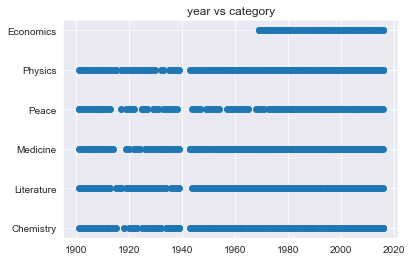

In [57]:
import matplotlib.pyplot as plt

years = df['year']
category = df['category']


fig, ax = plt.subplots()
plt.scatter(x=years,y=category)
ax.set_title('year vs category')
plt.show()

Or using pandas functionality

In [ ]:
ax = df.plot(kind='scatter',
             x='year',
             y='category',
             title='year vs category')

<AxesSubplot:xlabel='year'>

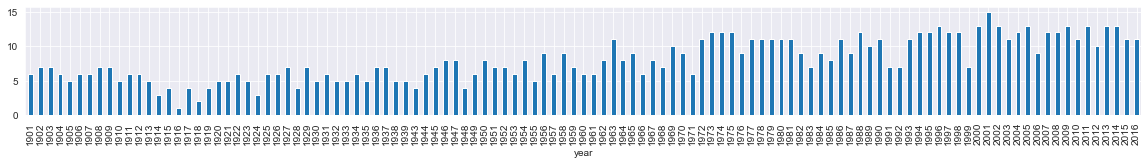

In [58]:
dc = df.groupby(['year'])['full_name'].count()
dc.plot(kind='bar', figsize =(20,2))

### 13. Avoid manually applying string methods
If there is a column with string values and is necessary to apply a string method,
in this case instead of using apply method

In [59]:
df['prize_name'] = df['prize'].apply(lambda x: str(x)[19:].upper())
df[:5]

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,sub_10,sub_10_new,prize_name
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,...,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,False,False,CHEMISTRY 1901
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,...,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,False,False,LITERATURE 1901
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),...,Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,False,False,PHYSIOLOGY OR MEDICINE 1901
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,...,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,False,False,ZE 1901
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,...,Male,NaN,NaN,NaN,1912-06-12,Paris,France,False,False,ZE 1901


pandas has **string method** and is possible to apply a string method to the entire column

In [60]:
df['prize_name_str'] = df['prize'].str[19:].str.upper()
df

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_name,organization_city,organization_country,death_date,death_city,death_country,sub_10,sub_10_new,prize_name,prize_name_str
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,...,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,False,False,CHEMISTRY 1901,CHEMISTRY 1901
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,...,NaN,NaN,NaN,1907-09-07,Châtenay,France,False,False,LITERATURE 1901,LITERATURE 1901
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),...,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,False,False,PHYSIOLOGY OR MEDICINE 1901,PHYSIOLOGY OR MEDICINE 1901
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,...,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,False,False,ZE 1901,ZE 1901
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,...,NaN,NaN,NaN,1912-06-12,Paris,France,False,False,ZE 1901,ZE 1901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,2016,Medicine,The Nobel Prize in Physiology or Medicine 2016,"""for his discoveries of mechanisms for autophagy""",1/1,927,Individual,Yoshinori Ohsumi,1945-02-09,Fukuoka,...,Tokyo Institute of Technology,Tokyo,Japan,NaT,NaN,NaN,True,True,PHYSIOLOGY OR MEDICINE 2016,PHYSIOLOGY OR MEDICINE 2016
907,2016,Peace,The Nobel Peace Prize 2016,"""for his resolute efforts to bring the country...",1/1,934,Individual,Juan Manuel Santos,1951-08-10,Bogotá,...,NaN,NaN,NaN,NaT,NaN,NaN,True,True,ZE 2016,ZE 2016
908,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/2,928,Individual,David J. Thouless,1934-09-21,Bearsden,...,University of Washington,"Seattle, WA",United States of America,NaT,NaN,NaN,True,True,PHYSICS 2016,PHYSICS 2016
909,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/4,929,Individual,F. Duncan M. Haldane,1951-09-14,London,...,Princeton University,"Princeton, NJ",United States of America,NaT,NaN,NaN,True,True,PHYSICS 2016,PHYSICS 2016


### 14. Avoid repeating commonly used data transformation
Is generally best practice to not repeat code ,unless needed, and create functions, this make code easy to read and
ensures that the same processing is done identically on all the dataframes

### 15. Use dictionary for renaming columns
Is possible to rename colums giving a list o new name
but is preferred and much cleaner way is to use the rename method and provide
a dictionary with the old and new names

In [62]:
df_subset = df[['year', 'category', 'prize', 'motivation', 'prize_share',
         'laureate_id', 'laureate_type', 'full_name', 'birth_date', 'birth_city',
         'birth_country', 'sex']]
print(df_subset.columns.to_list())

['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id', 'laureate_type', 'full_name', 'birth_date', 'birth_city', 'birth_country', 'sex']


In [64]:
#instead of this
new_col = [ col +"_new" for col in df_subset.columns.to_list()]
print(new_col)
df_subset.columns = new_col
df_subset.head(3)

['year_new', 'category_new', 'prize_new', 'motivation_new', 'prize_share_new', 'laureate_id_new', 'laureate_type_new', 'full_name_new', 'birth_date_new', 'birth_city_new', 'birth_country_new', 'sex_new']


,year_new,category_new,prize_new,motivation_new,prize_share_new,laureate_id_new,laureate_type_new,full_name_new,birth_date_new,birth_city_new,birth_country_new,sex_new
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male


In [65]:
# prefer this
df_subset = df[['year', 'category', 'prize', 'motivation', 'prize_share',
                'laureate_id', 'laureate_type', 'full_name', 'birth_date', 'birth_city',
                'birth_country', 'sex']]
df_subset = df_subset.rename(columns={"year":"year_nobel"})
df_subset.head(3)

,year_nobel,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male


### 16. Aggregating by groups not manually but with group by
Group by allows you to select a colum or columns to group the data on and then
to perform **any aggregation function** to those group indipendently

In [66]:
man_records = df.loc[df['sex'] == 'Male']['birth_date'].max()
female_records = df.loc[df['sex'] == 'Female']['birth_date'].max()
print(f"male {man_records}  female {female_records}")

male 1974-08-23 00:00:00  female 1997-07-12 00:00:00


In [67]:
records = df.groupby('sex')['birth_date'].max()
display(records)

sex
Female   1997-07-12
Male     1974-08-23
Name: birth_date, dtype: datetime64[ns]

### 17. Looping over the rows to create aggregates
Instead of iterating over each rows in the dataframe storing the result after each iteration ...


1908.8345323741007

1915.0

ModeResult(mode=array([1918.]), count=array([22]))

1918.0

array([[<AxesSubplot:title={'center':'birth_date'}>]], dtype=object)

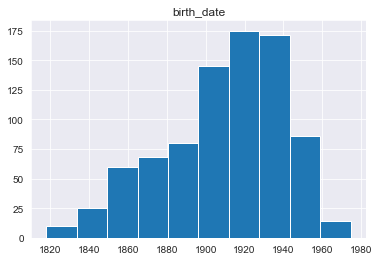

In [68]:
from scipy import stats as st

df['birth_date_dt'] = df['birth_date'].dt.date #convert from timestamp to date

mans_date = []
female_date = []
#gets average
for i, row in df.iterrows():
    group = row.sex
    if group == 'Male':
        mans_date.append( row.birth_date.year )
    else:
        female_date.append(row.birth_date_dt.year)

#man
mans_array = np.array(mans_date)
mans_array_data = mans_array[ ~np.isnan(mans_array) ] #remove nan
display(np.mean(mans_array_data))
display(np.median(mans_array_data))
display(st.mode(mans_array_data))
val, counts = np.unique(mans_array_data, return_counts=True)
display(val[np.argmax(counts)])
df.query('sex == "Male"').hist(
    column='birth_date'
)


1921.5510204081634

1930.0

ModeResult(mode=array([1867.]), count=array([3]))

1867.0

array([[<AxesSubplot:title={'center':'birth_date'}>]], dtype=object)

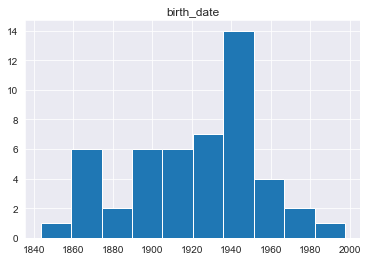

In [69]:
#man
fem_array = np.array(female_date)
fem_array_data = fem_array[ ~np.isnan(fem_array) ] #remove nan
display(np.mean(fem_array_data))
display(np.median(fem_array_data))
display(st.mode(fem_array_data))
val, counts = np.unique(fem_array_data, return_counts=True)
display(val[np.argmax(counts)])
df.query('sex == "Female"').hist(
    column='birth_date'
)

The same result can be calculated by simple groupby aggregation
Grouping in this way also allow to provide multiple way to aggregate data

In [70]:
display(df.groupby('sex')['birth_date'].aggregate(['mean','median']))
display(df.groupby('sex', as_index=False )['birth_date'].agg(['mean','median', lambda  x: st.mode(x)]))
display(df.groupby('sex', as_index=False )['birth_date'].agg(['mean','median', lambda  x: x.mode()]))
display(df.groupby('sex', as_index=False )['birth_date'].agg(['mean','median', lambda  x: x.value_counts().index[0]]))
#here a have not the same results coming on the mode ,  can be interesting to see why

,mean,median
sex,,
Female,1922-01-17 00:00:00.000000000,1930-12-30 00:00:00
Male,1909-05-07 11:53:05.611510784,1914-12-10 12:00:00


,mean,median,<lambda_0>
sex,,,
Female,1922-01-17 00:00:00.000000000,1930-12-30 00:00:00,"([1867-11-07T00:00:00.000000000], [2])"
Male,1909-05-07 11:53:05.611510784,1914-12-10 12:00:00,"([1843-05-21T00:00:00.000000000], [2])"


,mean,median,<lambda_0>
sex,,,
Female,1922-01-17 00:00:00.000000000,1930-12-30 00:00:00,1867-11-07 00:00:00
Male,1909-05-07 11:53:05.611510784,1914-12-10 12:00:00,"[1843-05-21 00:00:00, 1865-05-25 00:00:00, 188..."


,mean,median,<lambda_0>
sex,,,
Female,1922-01-17 00:00:00.000000000,1930-12-30 00:00:00,1867-11-07
Male,1909-05-07 11:53:05.611510784,1914-12-10 12:00:00,1901-02-28


### 18. Avoid if possible using a loop to calculate how values changes
In This example we are calculating the percent change ad the difference between the age column in each row of the data



In [71]:
from datetime import datetime

nobel_ages = pd.read_csv('datasets/nobel.csv', parse_dates=['birth_date','death_date']).sort_values('birth_date').reset_index()
display(nobel_ages[['birth_date', 'death_date']].isna().sum()) # find if there are some birth date  that are missing

# for age  calculation is necessary to fill null death values and remove null birth dates
nobel_ages['death_date'].fillna(datetime.now(), inplace=True)
nobel_ages = nobel_ages.query('birth_date.isnull() == False')
display(nobel_ages[['birth_date', 'death_date']].isna().sum()) #
nobel_ages['age'] = nobel_ages[['birth_date', 'death_date']].apply(lambda x: (x[1].year-x[0].year)  ,axis=1 )
nobel_ages[1:5]


birth_date     28
death_date    318
dtype: int64

birth_date    0
death_date    0
dtype: int64

,index,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,age
1,4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,90
2,16,1903,Peace,The Nobel Peace Prize 1903,NaN,1/1,466,Individual,William Randal Cremer,1828-03-18,Fareham,United Kingdom,Male,NaN,NaN,NaN,1908-07-22,London,United Kingdom,80
3,3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,82
4,53,1909,Peace,The Nobel Peace Prize 1909,NaN,1/2,475,Individual,Auguste Marie François Beernaert,1829-07-26,Ostend,Belgium,Male,NaN,NaN,NaN,1912-10-06,Lucerne,Switzerland,83


In [72]:
#ok in this case is a non sense calculate the percent, but here is just for demonstration

for i in range(1, len(nobel_ages)):
    nobel_ages.loc[i,'percent'] = \
        (nobel_ages.loc[i].age - nobel_ages.loc[i-1].age) / nobel_ages.loc[i].age
    nobel_ages.loc[i,'delta'] = (nobel_ages.loc[i].age - nobel_ages.loc[i-1].age)

nobel_ages.head(3)

,index,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,age,percent,delta
0,7,1902,Literature,The Nobel Prize in Literature 1902,"""the greatest living master of the art of hist...",1/1,571,Individual,Christian Matthias Theodor Mommsen,1817-11-30,...,Male,NaN,NaN,NaN,1903-11-01,Charlottenburg,Germany,86,NaN,NaN
1,4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,...,Male,NaN,NaN,NaN,1912-06-12,Paris,France,90,0.044444,4.0
2,16,1903,Peace,The Nobel Peace Prize 1903,NaN,1/1,466,Individual,William Randal Cremer,1828-03-18,...,Male,NaN,NaN,NaN,1908-07-22,London,United Kingdom,80,-0.125000,-10.0


We might be catching on a trend now but there is actually a built in function for doing things like this
It can be used the **pct_change()** , or the **diff()** method to calculate the change in the pandas serie

In [73]:
nobel_ages['age_ptc'] = nobel_ages['age'].pct_change()
nobel_ages['age_diff'] = nobel_ages['age'].diff()
nobel_ages.head()

,index,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,...,organization_city,organization_country,death_date,death_city,death_country,age,percent,delta,age_ptc,age_diff
0,7,1902,Literature,The Nobel Prize in Literature 1902,"""the greatest living master of the art of hist...",1/1,571,Individual,Christian Matthias Theodor Mommsen,1817-11-30,...,NaN,NaN,1903-11-01,Charlottenburg,Germany,86,NaN,NaN,NaN,NaN
1,4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,...,NaN,NaN,1912-06-12,Paris,France,90,0.044444,4.0,0.046512,4.0
2,16,1903,Peace,The Nobel Peace Prize 1903,NaN,1/1,466,Individual,William Randal Cremer,1828-03-18,...,NaN,NaN,1908-07-22,London,United Kingdom,80,-0.125000,-10.0,-0.111111,-10.0
3,3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,...,NaN,NaN,1910-10-30,Heiden,Switzerland,82,0.024390,2.0,0.025000,2.0
4,53,1909,Peace,The Nobel Peace Prize 1909,NaN,1/2,475,Individual,Auguste Marie François Beernaert,1829-07-26,...,NaN,NaN,1912-10-06,Lucerne,Switzerland,83,0.012048,1.0,0.012195,1.0


### 19. Saving large datasets as csv
When working with pandas eventually you get to the point that you have to save to disk the dataframe
csv is the most common format data to save csv data, but especially with very large datasets
this can be very slow and take up a lot lof space on the hard drive
Pandas have alot of built in methods to save to many different file like parquet, feather and pickle
These file formats retain the data types of your data which saves you from having to set them menaually
when reloading the files

Note- For these formats you must pip or conda install new packages (package pyarrow take a lot of time)



In [ ]:
!pip install fastparquet

In [ ]:

nobel_ages.to_csv("datasets/nobel_ages.csv", index=False)
nobel_ages.to_parquet("datasets/nobel_ages.parquet")
nobel_ages.to_pickle("datasets/nobel_ages.pickle")
nobel_ages.to_feather("datasets/nobel_ages.feather")

### 20. Apply style to dataframe like in excel
This type of style can be extremely  powerful and covers almost everything you want to do in Excel
reference here https://www.analyticsvidhya.com/blog/2021/06/style-your-pandas-dataframe-and-make-it-stunning/

In [74]:
ddf= nobel_ages.sort_values('age')[['category','age']].reset_index(drop=True).\
    head(10)
ddf = ddf.style.set_properties(**{'border': '1.3px solid green', 'color':'blue' })
ddf.to_excel('datasets/excel.xlsx')

dfexcel = pd.DataFrame(np.random.randn(10,4), columns=['A','B','C','D'])
dfexcel = dfexcel.style.format('{:.3f}', na_rep="").\
    bar(align=0, vmin=2.5, vmax=2.5, cmap="bwr", height=50,width=60, props="width: 120px; border-right: 1px sold black;").\
    text_gradient(cmap="bwr", vmin=-2.5, vmax=2.5)

dfexcel.to_excel('datasets/excel_complex.xlsx')


### 21. Setting proper suffixes when merging 2 dataframes
When merging 2 dataframes, any columns that appear on both dataframe but non being used to merge
will be given the default _x and _y suffixes


In [78]:
male= nobel_ages.query('sex =="Male" ')[['year','category', 'sex', 'prize', 'full_name']].copy()
female= nobel_ages.query('sex =="Female" ')[['year', 'category', 'sex', 'prize', 'full_name']].copy()
merge = male.merge(female, on=['year', 'category'])
merge[:5]

,year,category,sex_x,prize_x,full_name_x,sex_y,prize_y,full_name_y
0,1903,Physics,Male,The Nobel Prize in Physics 1903,Antoine Henri Becquerel,Female,The Nobel Prize in Physics 1903,"Marie Curie, née Sklodowska"
1,1903,Physics,Male,The Nobel Prize in Physics 1903,Pierre Curie,Female,The Nobel Prize in Physics 1903,"Marie Curie, née Sklodowska"
2,1931,Peace,Male,The Nobel Peace Prize 1931,Nicholas Murray Butler,Female,The Nobel Peace Prize 1931,Jane Addams
3,1946,Peace,Male,The Nobel Peace Prize 1946,John Raleigh Mott,Female,The Nobel Peace Prize 1946,Emily Greene Balch
4,1947,Medicine,Male,The Nobel Prize in Physiology or Medicine 1947,Bernardo Alberto Houssay,Female,The Nobel Prize in Physiology or Medicine 1947,"Gerty Theresa Cori, née Radnitz"


By explicitly stating the suffixes in your merge you can more easily track what these columns are

In [77]:
merge = male.merge(female, on=['year', 'category'], suffixes=("_male","_female"))
merge[:5]

,year,category,sex_male,prize_male,full_name_male,sex_female,prize_female,full_name_female
0,1903,Physics,Male,The Nobel Prize in Physics 1903,Antoine Henri Becquerel,Female,The Nobel Prize in Physics 1903,"Marie Curie, née Sklodowska"
1,1903,Physics,Male,The Nobel Prize in Physics 1903,Pierre Curie,Female,The Nobel Prize in Physics 1903,"Marie Curie, née Sklodowska"
2,1931,Peace,Male,The Nobel Peace Prize 1931,Nicholas Murray Butler,Female,The Nobel Peace Prize 1931,Jane Addams
3,1946,Peace,Male,The Nobel Peace Prize 1946,John Raleigh Mott,Female,The Nobel Peace Prize 1946,Emily Greene Balch
4,1947,Medicine,Male,The Nobel Prize in Physiology or Medicine 1947,Bernardo Alberto Houssay,Female,The Nobel Prize in Physiology or Medicine 1947,"Gerty Theresa Cori, née Radnitz"


### 22. Checking consistency after merging 2 dataframes
There mey be cases that when you're merging 2 dataframe and want to confirm that the merge is one to one match
It can be checked for this by comparing the length of the merged dataframe with the initial dataframe
Pandas marge has a validate parameter which will automatically check for different merge types.
This will trow an error message if validation fails

validate
If specified, checks if merge is of specified type.
* “one_to_one” or “1:1”: check if merge keys are unique in both left and right datasets.
* “one_to_many” or “1:m”: check if merge keys are unique in left dataset.
* “many_to_one” or “m:1”: check if merge keys are unique in right dataset.
*   “many_to_many” or “m:m”: allowed, but does not result in checks.

In [79]:
merge = male.merge(female,
                   on=['year', 'category'],
                   suffixes=("_male","_female"),
                   validate='m:m')

In [80]:
merge = male.merge(female,
                   on=['year', 'category'],
                   suffixes=("_male","_female"),
                   validate='1:1')

MergeError: Merge keys are not unique in either left or right dataset; not a one-to-one merge

### 23. Stacking chained commands into one line of code
Method chaining is a great feature in pandas, but code can get really unreadable if it is all in one line.
By wrapping expression in parentheses, code can be split so that each line has one component.

In [81]:
nobel_ages_view = (nobel_ages
                   .groupby(['year', 'category'])['prize']
                   .count()
                   .reset_index()
                   .fillna(0)
                   .sort_values('year')
                   )
nobel_ages_view

,year,category,prize
0,1901,Chemistry,1
1,1901,Literature,1
2,1901,Medicine,1
3,1901,Peace,2
4,1901,Physics,1
...,...,...,...
555,2016,Chemistry,3
556,2016,Economics,2
557,2016,Literature,1
558,2016,Medicine,1


### 24. Using categorical data types
In this example there are a grouping column tha conteins only 2 potential values
Instead of storing column like this as a string object, is better to store them as a categorical data type.
Categorical data type take less space in memory and can make operation much faster on large datasets

In [82]:
nobel_ages['sex'] = nobel_ages['sex'].astype('category')
nobel_ages['category'] = nobel_ages['category'].astype('category')
nobel_ages.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 883 entries, 0 to 882
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 883 non-null    int64         
 1   year                  883 non-null    int64         
 2   category              883 non-null    category      
 3   prize                 883 non-null    object        
 4   motivation            811 non-null    object        
 5   prize_share           883 non-null    object        
 6   laureate_id           883 non-null    int64         
 7   laureate_type         883 non-null    object        
 8   full_name             883 non-null    object        
 9   birth_date            883 non-null    datetime64[ns]
 10  birth_city            881 non-null    object        
 11  birth_country         883 non-null    object        
 12  sex                   883 non-null    category      
 13  organization_name   

### 25. Be aware of creating duplicated label columns
 This is when concatenating 2 dataframes as can be seen below, if columns have same name they are duplicated.
 This can be really confusing and hard to debug if we do not know that this  is possible.


In [100]:
df_subset  = nobel_ages[['year', 'category', 'full_name']]
df_duplicate = pd.concat([df_subset,df_subset], axis=1)
df_duplicate

,year,category,full_name,year,category,full_name
0,1902,Literature,Christian Matthias Theodor Mommsen,1902,Literature,Christian Matthias Theodor Mommsen
1,1901,Peace,Frédéric Passy,1901,Peace,Frédéric Passy
2,1903,Peace,William Randal Cremer,1903,Peace,William Randal Cremer
3,1901,Peace,Jean Henry Dunant,1901,Peace,Jean Henry Dunant
4,1909,Peace,Auguste Marie François Beernaert,1909,Peace,Auguste Marie François Beernaert
...,...,...,...,...,...,...
878,2011,Physics,Adam G. Riess,2011,Physics,Adam G. Riess
879,2011,Peace,Leymah Gbowee,2011,Peace,Leymah Gbowee
880,2010,Physics,Konstantin Novoselov,2010,Physics,Konstantin Novoselov
881,2011,Peace,Tawakkol Karman,2011,Peace,Tawakkol Karman


Panda does have a flag that can be set whic can allert when duplicate label occurs

In [83]:
df_duplicate = pd.concat([df_subset,df_subset], axis=1)\
    .set_flags(allows_duplicate_labels=False)
df_duplicate

DuplicateLabelError: Index has duplicates.
              positions
label                  
year_nobel      [0, 12]
category        [1, 13]
prize           [2, 14]
motivation      [3, 15]
prize_share     [4, 16]
laureate_id     [5, 17]
laureate_type   [6, 18]
full_name       [7, 19]
birth_date      [8, 20]
birth_city      [9, 21]
birth_country  [10, 22]
sex            [11, 23]

This can be solved by using this line of code, that will check for duplicated column and remove them.

In [84]:
df_duplicate = pd.concat([df_subset,df_subset], axis=1)
df_duplicate = df_duplicate.loc[:, ~df_duplicate.columns.duplicated()].copy()
df_duplicate

,year_nobel,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male
...,...,...,...,...,...,...,...,...,...,...,...,...
906,2016,Medicine,The Nobel Prize in Physiology or Medicine 2016,"""for his discoveries of mechanisms for autophagy""",1/1,927,Individual,Yoshinori Ohsumi,1945-02-09,Fukuoka,Japan,Male
907,2016,Peace,The Nobel Peace Prize 2016,"""for his resolute efforts to bring the country...",1/1,934,Individual,Juan Manuel Santos,1951-08-10,Bogotá,Colombia,Male
908,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/2,928,Individual,David J. Thouless,1934-09-21,Bearsden,United Kingdom,Male
909,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/4,929,Individual,F. Duncan M. Haldane,1951-09-14,London,United Kingdom,Male
